### Let's get an idea of how often these pipes are cleaned

In [12]:
df1.set_index('last_cleaned').groupby(pd.Grouper(freq='M')).count()

,report_date,total_gallons,gallons_returned,spill_start,spill_stop,hours,cause,actions,watershed,unit_id_1,unit_id_2,discharge_to,discharge_route,council_district,month,year,week,edwards_zone,pipe_diameter,pipe_length,pipe_type,installation_year,inches_no,rainfall_less_3,num_spills_compkey,num_spills_24mos,unit_type,asset_type,response_time,response_datetime,public_notice,time_int,root_cause,steps_to_prevent,spill_street_address,multiple_spills
last_cleaned,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2009-03-31,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,0,9,9,9,9,9,9
2009-04-30,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,0,28,28,28,28,28,28
2009-05-31,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,0,26,26,26,26,26,26
2009-06-30,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,0,25,25,25,25,25,25
2009-07-31,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,0,14,14,14,14,14,14
2009-08-31,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,0,20,20,20,20,20,20
2009-09-30,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,0,26,26,26,26,26,26
2009-10-31,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,0,41,41,41,41,41,41
2009-11-30,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,2,29,29,29,29,29,29


In [13]:
df1.last_cleaned.value_counts(dropna=False)

NaT           2082
2009-09-23       6
2009-10-22       5
2009-08-22       5
2012-05-11       5
2009-11-25       4
2009-12-07       4
2009-04-18       4
2012-02-29       4
2010-01-07       4
2010-06-01       4
2009-10-20       4
2009-11-23       4
2013-06-19       4
2009-12-28       4
2009-12-22       3
2010-02-11       3
2013-11-22       3
2012-11-19       3
2010-08-09       3
2010-10-04       3
2011-03-17       3
2014-06-18       3
2013-10-17       3
2010-02-22       3
2009-06-24       3
2010-02-15       3
2011-12-07       3
2010-01-04       3
2010-10-07       3
2009-03-17       3
2014-04-11       3
2011-02-12       3
2010-08-27       3
2011-03-21       3
2010-02-05       3
2011-11-10       3
2011-10-19       3
2009-12-10       3
2009-05-01       3
2011-05-26       3
2010-08-26       3
2009-11-12       3
2010-04-15       3
2009-08-29       3
2010-09-21       3
2010-03-15       3
2010-11-18       3
2011-08-03       3
2010-03-08       3
2010-02-19       3
2009-12-17       3
2013-08-22  

In [23]:
df2[df2.cause == 'grease'].months_elapsed.describe()

count    406.000000
mean      10.553701
std       10.427192
min        0.032855
25%        3.400481
50%        7.474486
75%       14.702561
max       63.574201
Name: months_elapsed, dtype: float64

#### _Looking for the repeat offenders..._

In [27]:
df1.num_spills_24mos[df1.num_spills_24mos > 1].value_counts()

2     180
3      75
4      32
5      27
6      19
7      12
8       7
9       5
13      1
12      1
11      1
10      1
Name: num_spills_24mos, dtype: int64

#### _Locations of the most frequent SSOs in 2 years_

In [28]:
df1[['spill_street_address']][df1.num_spills_24mos >= 9]

,spill_street_address
33,6606 Swiss Oaks
40,6606 Swiss Oaks
84,108 Chappie James Way
153,6606 Swiss Oaks
593,10800 Entrance Rd Ne
727,10800 Entrance Rd Ne
738,10800 Entrance Rd Ne
751,10823 Entrance Rd Ne
762,10700 Entrance Rd Ne


#### _Total number of gallons spilled by the most frequent SSOs in 2 years_

In [29]:
df1.total_gallons[df1.num_spills_24mos >= 9].agg('sum')

3538455

#### _Most common root causes of SSOs_

In [49]:
df1.root_cause.value_counts()

structural           1237
grease                611
debris                444
rain event            353
contractor            164
lift station          125
other                  61
vandalism              48
rain event             48
vandalism              24
roots                  22
lift station           15
i/i                    12
contractor              8
na                      7
by pass pump leak       3
other                   1
Name: root_cause, dtype: int64

In [33]:
df1[['spill_street_address', 'unit_id_1','unit_id_2', 'unit_type', 'asset_type']].head(15)

,spill_street_address,unit_id_1,unit_id_2,unit_type,asset_type
0,3200 Thousand Oaks Dr,66918,66917,gravity,sewer main
1,6804 S Flores St,24250,24193,gravity,sewer main
2,215 Audrey Alene Dr,2822,3351,gravity,sewer main
3,3602 Se Military Dr,92804,92805,gravity,sewer main
4,100 Pansy Ln,61141,49543,gravity,sewer main
5,3200 S Hackberry St,38907,26117,gravity,sewer main
6,9910 Sugarloaf Dr,85120,85363,gravity,sewer main
7,3507 Piedmont Ave,26128,24334,gravity,sewer main
8,349 Alicia,47292,47293,gravity,sewer main
9,1502 W Mistletoe Ave,14241,14896,gravity,sewer main


In [34]:
df1.unit_id_1.value_counts()[df1.unit_id_1.value_counts() > 7]

52470     15
LS200     14
1187      13
903059    12
LS199     12
62085     10
903060    10
1210      10
47822     10
LS188     10
424896     8
29988      8
11989      8
LS201      8
Name: unit_id_1, dtype: int64

In [36]:
df1['root_cause'].value_counts()

structural           1237
grease                611
debris                444
rain event            353
contractor            164
lift station          125
other                  61
vandalism              48
rain event             48
vandalism              24
roots                  22
lift station           15
i/i                    12
contractor              8
na                      7
by pass pump leak       3
other                   1
Name: root_cause, dtype: int64

In [37]:
df1['spill_street_address'].value_counts()[df1.spill_street_address.value_counts() > 7]

6606 Swiss Oaks          24
108 Chappie James Way    20
700 Holbrook             16
10800 Entrance Rd Ne     14
6305 Cagnon Rd           13
6785 Cagnon Rd           12
1800 Austin Hwy          12
1427 Harry Wurzbach      12
23500 Ih 10 W            12
668 Holbrook             10
10102 Us Hwy 90 W         9
3847 Thousand Oaks        8
Name: spill_street_address, dtype: int64

#### _Looking for locations with most SSOs that are also caused by grease._

In [39]:
df1['counts'] = df1.root_cause
df1['counts'] = df1.groupby(['spill_street_address']).transform('count')
df1

,report_date,total_gallons,gallons_returned,spill_start,spill_stop,hours,cause,actions,watershed,unit_id_1,unit_id_2,discharge_to,discharge_route,council_district,month,year,week,edwards_zone,pipe_diameter,pipe_length,pipe_type,installation_year,inches_no,rainfall_less_3,num_spills_compkey,num_spills_24mos,unit_type,asset_type,last_cleaned,response_time,response_datetime,public_notice,time_int,root_cause,steps_to_prevent,spill_street_address,multiple_spills,counts
0,2019-03-10,2100,2100.0,3/10/2019 1:16:00 PM,3/10/2019 2:40:00 PM,1.400000,grease,cleaned main,salado creek,66918,66917,street,none,0,3,2019,11,0,8.0,16.550000,pvc,1997,0.00,0.00,1,1,gravity,sewer main,NaT,0.45,2019-03-10,False,24,na,na,3200 Thousand Oaks Dr,False,1
1,2019-03-10,80,0.0,3/10/2019 2:25:00 PM,3/10/2019 3:45:00 PM,1.333333,grease,cleaned main,dos rios,24250,24193,stormdrain,none,3,3,2019,11,0,8.0,157.000000,pvc,1988,0.00,0.00,1,1,gravity,sewer main,NaT,1.08,2019-03-10,False,120,na,na,6804 S Flores St,False,1
2,2019-03-09,79,0.0,3/9/2019 6:00:00 PM,3/9/2019 7:30:00 PM,1.500000,structural,cleaned main,dos rios,2822,3351,alley,none,1,3,2019,10,0,8.0,350.000000,cp,1955,0.00,0.00,1,1,gravity,sewer main,NaT,1.00,2019-03-09,False,24,na,na,215 Audrey Alene Dr,True,1
3,2019-03-09,83,0.0,3/9/2019 3:37:00 PM,3/9/2019 5:00:00 PM,1.383333,grease,na,salado creek,92804,92805,easement,none,3,3,2019,10,0,8.0,213.910000,pvc,1983,0.00,0.00,1,1,gravity,sewer main,NaT,0.55,2019-03-09,False,120,na,na,3602 Se Military Dr,False,1
4,2019-03-06,75,0.0,3/6/2019 9:40:00 AM,3/6/2019 9:55:00 AM,0.250000,structural,cleaned main,salado creek,61141,49543,street,none,2,3,2019,10,0,12.0,291.900000,cp,1952,0.00,0.00,2,2,gravity,sewer main,NaT,0.00,2019-03-06,False,3,na,na,100 Pansy Ln,False,1
5,2019-03-05,250,0.0,3/5/2019 2:22:00 PM,3/5/2019 2:32:00 PM,0.166667,grease,cleaned main,dos rios,38907,26117,street,none,3,3,2019,10,0,8.0,315.000000,rl,1992,0.00,0.00,2,2,gravity,sewer main,NaT,0.00,2019-03-05,False,12,na,na,3200 S Hackberry St,False,1
6,2019-03-02,73,0.0,3/2/2019 1:42:00 PM,3/2/2019 2:55:00 PM,1.216667,grease,cleaned main,medio creek,85120,85363,drainage culvert,none,4,3,2019,9,0,8.0,264.470000,pvc,1985,0.00,0.00,1,1,gravity,sewer main,NaT,0.73,2019-03-02,False,120,grease,"Increase FCS,",9910 Sugarloaf Dr,False,1
7,2019-03-01,76,0.0,3/1/2019 6:34:00 PM,3/1/2019 7:50:00 PM,1.266667,grease,cleaned main,dos rios,26128,24334,stormdrain,none,3,3,2019,9,0,8.0,60.000000,rl,2015,0.00,0.00,1,1,gravity,sewer main,NaT,0.43,2019-03-01,False,120,na,"Increase FCS,",3507 Piedmont Ave,False,2
8,2019-02-26,3750,0.0,2/26/2019 9:00:00 AM,2/26/2019 10:15:00 AM,1.250000,structural,cleaned main,leon creek,47292,47293,stormdrain,none,7,2,2019,9,0,8.0,175.390000,cp,1956,0.00,0.00,1,1,gravity,sewer main,NaT,0.00,2019-02-26,False,120,structural,"Design Request,",349 Alicia,False,1
9,2019-02-26,66,0.0,2/26/2019 5:24:00 PM,2/26/2019 6:30:00 PM,1.100000,grease,cleaned main,dos rios,14241,14896,street,none,1,2,2019,9,0,8.0,194.100000,pvc,1992,0.00,0.00,1,1,gravity,sewer main,NaT,0.43,2019-02-26,False,120,debris,"Increase FCS,",1502 W Mistletoe Ave,False,1


#### _Below shows the most frequent SSOs that are caused by grease._

In [40]:
df1.loc[(df1['counts'] >= 7) & (df1['root_cause'] == 'grease')]

,report_date,total_gallons,gallons_returned,spill_start,spill_stop,hours,cause,actions,watershed,unit_id_1,unit_id_2,discharge_to,discharge_route,council_district,month,year,week,edwards_zone,pipe_diameter,pipe_length,pipe_type,installation_year,inches_no,rainfall_less_3,num_spills_compkey,num_spills_24mos,unit_type,asset_type,last_cleaned,response_time,response_datetime,public_notice,time_int,root_cause,steps_to_prevent,spill_street_address,multiple_spills,counts
171,2018-08-12,75000,0.0,8/12/2018 4:15:00 PM,8/12/2018 6:30:00 PM,2.25,i/i,diluted by heavy rain water,leon creek,903060,903059,creek bed - spilled into leon creek,leon creek,6,8,2018,33,0,66.0,27.15,frp,2014,0.42,0.20,9,8,outfall,sewer main,NaT,0.25,2018-08-12,True,120,grease,na,6606 Swiss Oaks,True,24
569,2016-09-26,20,0.0,9/26/2016 11:00:00 AM,9/26/2016 11:00:00 AM,0.00,i/i,cleaned area,salado creek,62085,62088,ground,none,0,9,2016,40,0,0.0,8.46,,2015,4.75,1.36,4,4,gravity,sewer main,NaT,0.00,2016-09-26,False,0,grease,"Increase FCS,",1427 Harry Wurzbach,False,12
1317,2013-10-12,60,0.0,10/12/2013 1:24:00 PM,10/12/2013 2:00:00 PM,0.60,grease,cleaned main,dos rios,2386,15741,alley,none,1,10,2013,41,0,8.0,252.14,ct,1950,0.12,0.00,1,0,gravity,sewer main,2012-08-09,0,NaT,False,0,grease,"Increase FCS,",3714 Neer Ave,False,7
1852,2012-02-05,50,20.0,2/5/2012 5:38:00 PM,2/5/2012 6:20:00 PM,0.70,grease,cleaned main,dos rios,13472,26491,street,none,3,2,2012,6,0,8.0,27.21,cas,1988,0.14,2.30,3,2,siphon,sewer main,2011-11-10,0,NaT,False,0,grease,na,7930 Flores St S,False,7
1868,2012-01-28,200,100.0,1/28/2012 5:45:00 PM,1/28/2012 7:00:00 PM,1.25,grease,cleaned main,dos rios,12811,13472,drainage culvert,harlandale creek,3,1,2012,4,0,8.0,143.40,cas,1988,0.00,2.94,5,3,siphon,sewer main,2011-11-10,0,NaT,False,0,grease,na,7930 Flores St S,False,7
3034,2009-06-09,2000,0.0,6/9/2009 12:30:00 PM,6/9/2009 3:30:00 PM,3.00,grease,cleaned main,dos rios,24234,26490,creek bed,na,3,6,2009,24,0,8.0,106.70,pvc,1988,0.00,0.00,1,0,gravity,sewer main,2009-05-02,0,NaT,False,0,grease,na,7930 Flores St S,False,7
3072,2009-05-02,30,0.0,5/2/2009 5:30:00 PM,5/2/2009 6:00:00 PM,0.50,grease,cleaned main,dos rios,18257,18255,drainage culvert,na,6,5,2009,18,0,8.0,318.60,pvc,1991,0.00,0.00,1,0,gravity,sewer main,NaT,0,NaT,False,0,grease,na,7930 Flores St S,False,7


In [60]:
most_gallons = pd.DataFrame(df1.groupby('spill_street_address')['total_gallons'].agg('sum').sort_values(ascending=False)[:10])

In [61]:
most_gallons

,total_gallons
spill_street_address,
6606 Swiss Oaks,23636682
108 Chappie James Way,14333036
700 Holbrook,12826210
1800 Austin Hwy,4919388
8600 Mission Pkwy,4537445
300 Petaluma Blvd E,3658000
668 Holbrook,2213059
1135 Mission Rd,1680800
23500 Ih 10 W,1453875


### Let's look at causes and root causes for biggest offenders.

In [79]:
df1[df1.spill_street_address == '6606 Swiss Oaks']['cause'].value_counts()

i/i                                                     17
structural                                               4
other - spill was caused by a surcharging sewer main     1
other - cause to be determined                           1
other                                                    1
Name: cause, dtype: int64

In [65]:
df1[df1.spill_street_address == '6606 Swiss Oaks']['root_cause'].value_counts()

rain event    20
other          3
grease         1
Name: root_cause, dtype: int64

### We will also look to make sure there are not spills right next to these locations.

In [91]:
df1[df1['spill_street_address'].str.contains('Swiss Oaks')].groupby('spill_street_address').agg('count')

,report_date,total_gallons,gallons_returned,spill_start,spill_stop,hours,cause,actions,watershed,unit_id_1,unit_id_2,discharge_to,discharge_route,council_district,month,year,week,edwards_zone,pipe_diameter,pipe_length,pipe_type,installation_year,inches_no,rainfall_less_3,num_spills_compkey,num_spills_24mos,unit_type,asset_type,last_cleaned,response_time,response_datetime,public_notice,time_int,root_cause,steps_to_prevent,multiple_spills,counts
spill_street_address,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6606 Swiss Oaks,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,0,24,24,24,24,24,24,24,24


In [80]:
df1[df1.spill_street_address == '108 Chappie James Way']['cause'].value_counts()

i/i    20
Name: cause, dtype: int64

In [67]:
df1[df1.spill_street_address == '108 Chappie James Way']['root_cause'].value_counts()

rain event    20
Name: root_cause, dtype: int64

In [98]:
df1[df1['spill_street_address'].str.contains('Chappie James Way')]['root_cause'].value_counts()

rain event     23
structural      1
rain event      1
Name: root_cause, dtype: int64

In [99]:
df1[df1['spill_street_address'].str.contains('Chappie James Way')]['cause'].value_counts()

i/i       24
debris     1
Name: cause, dtype: int64

In [100]:
df1[df1['spill_street_address'].str.contains('Chappie James Way')]['total_gallons'].agg('sum')

15518896

In [92]:
df1[df1['spill_street_address'].str.contains('Chappie James Way')].groupby('spill_street_address').agg('count')

,report_date,total_gallons,gallons_returned,spill_start,spill_stop,hours,cause,actions,watershed,unit_id_1,unit_id_2,discharge_to,discharge_route,council_district,month,year,week,edwards_zone,pipe_diameter,pipe_length,pipe_type,installation_year,inches_no,rainfall_less_3,num_spills_compkey,num_spills_24mos,unit_type,asset_type,last_cleaned,response_time,response_datetime,public_notice,time_int,root_cause,steps_to_prevent,multiple_spills,counts
spill_street_address,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0 Chappie James Way,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,1,1,1
100 Chappie James Way,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,0,4,4,4,4,4,4,4,4
108 Chappie James Way,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,0,20,20,20,20,20,20,20,20


In [81]:
df1[df1.spill_street_address == '700 Holbrook']['cause'].value_counts()

i/i    16
Name: cause, dtype: int64

In [68]:
df1[df1.spill_street_address == '700 Holbrook']['root_cause'].value_counts()

rain event    16
Name: root_cause, dtype: int64

In [82]:
df1[df1.spill_street_address == '1800 Austin Hwy']['cause'].value_counts()

i/i       11
grease     1
Name: cause, dtype: int64

In [69]:
df1[df1.spill_street_address == '1800 Austin Hwy']['root_cause'].value_counts()

rain event    11
debris         1
Name: root_cause, dtype: int64

In [93]:
df1[df1['spill_street_address'].str.contains('Austin Hwy')].groupby('spill_street_address').agg('count')

,report_date,total_gallons,gallons_returned,spill_start,spill_stop,hours,cause,actions,watershed,unit_id_1,unit_id_2,discharge_to,discharge_route,council_district,month,year,week,edwards_zone,pipe_diameter,pipe_length,pipe_type,installation_year,inches_no,rainfall_less_3,num_spills_compkey,num_spills_24mos,unit_type,asset_type,last_cleaned,response_time,response_datetime,public_notice,time_int,root_cause,steps_to_prevent,multiple_spills,counts
spill_street_address,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1201 Austin Hwy,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1
1320 Austin Hwy,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1
1470 Austin Hwy,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,1,1,1
1800 Austin Hwy,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,0,12,12,12,12,12,12,12,12
1804 Austin Hwy,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1
1916 Austin Hwy,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,1,4,3,4,4,4,4,4,4
2009 Austin Hwy,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1
2818 Austin Hwy,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1
903 Austin Hwy,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,1,1,1


In [83]:
df1[df1.spill_street_address == '8600 Mission Pkwy']['cause'].value_counts()

break in main            3
break in by-pass line    1
structural               1
lift station pump out    1
Name: cause, dtype: int64

In [70]:
df1[df1.spill_street_address == '8600 Mission Pkwy']['root_cause'].value_counts()

structural       3
lift station     2
lift station     1
Name: root_cause, dtype: int64

In [94]:
df1[df1['spill_street_address'].str.contains('Mission Pkwy')].groupby('spill_street_address').agg('count')

,report_date,total_gallons,gallons_returned,spill_start,spill_stop,hours,cause,actions,watershed,unit_id_1,unit_id_2,discharge_to,discharge_route,council_district,month,year,week,edwards_zone,pipe_diameter,pipe_length,pipe_type,installation_year,inches_no,rainfall_less_3,num_spills_compkey,num_spills_24mos,unit_type,asset_type,last_cleaned,response_time,response_datetime,public_notice,time_int,root_cause,steps_to_prevent,multiple_spills,counts
spill_street_address,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
8600 Mission Pkwy,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,0,6,0,6,6,6,6,6,6


In [84]:
df1[df1.spill_street_address == '300 Petaluma Blvd E']['cause'].value_counts()

i/i            1
debris/rock    1
Name: cause, dtype: int64

In [71]:
df1[df1.spill_street_address == '300 Petaluma Blvd E']['root_cause'].value_counts()

contractor     2
Name: root_cause, dtype: int64

In [95]:
df1[df1['spill_street_address'].str.contains('Petaluma')].groupby('spill_street_address').agg('count')

,report_date,total_gallons,gallons_returned,spill_start,spill_stop,hours,cause,actions,watershed,unit_id_1,unit_id_2,discharge_to,discharge_route,council_district,month,year,week,edwards_zone,pipe_diameter,pipe_length,pipe_type,installation_year,inches_no,rainfall_less_3,num_spills_compkey,num_spills_24mos,unit_type,asset_type,last_cleaned,response_time,response_datetime,public_notice,time_int,root_cause,steps_to_prevent,multiple_spills,counts
spill_street_address,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
300 Petaluma Blvd E,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0,2,0,2,2,2,2,2,2
342 Petaluma Blvd E,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1


In [85]:
df1[df1.spill_street_address == '668 Holbrook']['cause'].value_counts()

i/i      9
other    1
Name: cause, dtype: int64

In [72]:
df1[df1.spill_street_address == '668 Holbrook']['root_cause'].value_counts()

rain event    9
other         1
Name: root_cause, dtype: int64

In [86]:
df1[df1.spill_street_address == '1135 Mission Rd']['cause'].value_counts()

i/i              4
break in main    1
Name: cause, dtype: int64

In [73]:
df1[df1.spill_street_address == '1135 Mission Rd']['root_cause'].value_counts()

rain event    4
structural    1
Name: root_cause, dtype: int64

In [96]:
df1[df1['spill_street_address'].str.contains('Mission Rd')].groupby('spill_street_address').agg('count')

,report_date,total_gallons,gallons_returned,spill_start,spill_stop,hours,cause,actions,watershed,unit_id_1,unit_id_2,discharge_to,discharge_route,council_district,month,year,week,edwards_zone,pipe_diameter,pipe_length,pipe_type,installation_year,inches_no,rainfall_less_3,num_spills_compkey,num_spills_24mos,unit_type,asset_type,last_cleaned,response_time,response_datetime,public_notice,time_int,root_cause,steps_to_prevent,multiple_spills,counts
spill_street_address,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100 Mission Rd,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0,2,0,2,2,2,2,2,2
1133 Mission Rd,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1
1135 Mission Rd,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,0,5,3,5,5,5,5,5,5
1151 Mission Rd,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0,2,2,2,2,2,2,2,2
1500 Mission Rd,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0,2,1,2,2,2,2,2,2
1515 Mission Rd,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0,2,1,2,2,2,2,2,2
15751 Mission Rdg,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1
703 Mission Rd,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,1,1,1


In [87]:
df1[df1.spill_street_address == '23500 Ih 10 W']['cause'].value_counts()

i/i    12
Name: cause, dtype: int64

In [74]:
df1[df1.spill_street_address == '23500 Ih 10 W']['root_cause'].value_counts()

rain event      11
lift station     1
Name: root_cause, dtype: int64

In [88]:
df1[df1.spill_street_address == '1006 Holbrook']['cause'].value_counts()

i/i    4
Name: cause, dtype: int64

In [75]:
df1[df1.spill_street_address == '1006 Holbrook']['root_cause'].value_counts()

rain event    4
Name: root_cause, dtype: int64

In [90]:
df1[df1['spill_street_address'].str.contains('Holbrook')].groupby('council_district')['total_gallons'].agg('sum')

council_district
2     17027404
10      532625
Name: total_gallons, dtype: int64

In [97]:
df1[df1['spill_street_address'].str.contains('Holbrook')].groupby('council_district')['root_cause'].agg('count')

council_district
2     41
10     1
Name: root_cause, dtype: int64

In [62]:
most_gallons.to_csv('data/most_gallons.csv')

#### _Below shows the most devastating SSOs by volume._

In [156]:
df1[df1.pipe_diameter > 0].pipe_diameter.describe()

count    2945.000000
mean       11.566214
std        10.151328
min         4.000000
25%         8.000000
50%         8.000000
75%        10.000000
max        66.000000
Name: pipe_diameter, dtype: float64

In [41]:
df1[df1.total_gallons > 1500000]

,report_date,total_gallons,gallons_returned,spill_start,spill_stop,hours,cause,actions,watershed,unit_id_1,unit_id_2,discharge_to,discharge_route,council_district,month,year,week,edwards_zone,pipe_diameter,pipe_length,pipe_type,installation_year,inches_no,rainfall_less_3,num_spills_compkey,num_spills_24mos,unit_type,asset_type,last_cleaned,response_time,response_datetime,public_notice,time_int,root_cause,steps_to_prevent,spill_street_address,multiple_spills,counts
84,2018-10-24,2448400,0.0,10/24/2018 1:50:00 PM,10/28/2018 1:29:00 PM,95.650000,i/i,monitored area,leon creek,1210,42319,creek bed - spilled into leon creek,leon creek,0,10,2018,43,0,54.0,1335.00,rcp,1965,0.79,0.49,10,9,outfall,sewer main,NaT,0.00,2018-10-24,True,0,rain event,"Capacity Project,",108 Chappie James Way,False,20
112,2018-09-22,1640538,0.0,9/22/2018 8:40:00 AM,9/23/2018 4:00:00 AM,19.333333,i/i,diluted by heavy rainwater,salado creek,47427,46546,creek bed - spilled into salado creek,salado creek,10,9,2018,38,0,48.0,54.81,rcp,1965,1.86,0.56,3,3,outfall,sewer main,NaT,0.00,2018-09-22,True,24,rain event,"Capacity Project,",1800 Austin Hwy,True,12
115,2018-09-20,13304550,0.0,9/20/2018 9:45:00 AM,11/19/2018 1:30:00 AM,620.070000,i/i,monitored area,leon creek,903059,71380,creek bed - spilled into leon creek,leon creek,6,9,2018,38,0,42.0,1301.00,rcp,1973,0.56,0.00,5,5,outfall,sewer main,NaT,0.00,2018-09-20,True,0,rain event,"Capacity Project,",6606 Swiss Oaks,False,24
504,2016-12-03,1880100,0.0,12/3/2016 9:24:00 AM,12/4/2016 9:00:00 AM,23.600000,i/i,diluted by heavy rain water,leon creek,462766,1210,creek bed - spilled into leon creek,leon creek,0,12,2016,49,0,54.0,17.18,csc,1983,3.84,0.66,1,1,siphon,sewer main,NaT,0.60,2016-12-03,True,0,rain event,"I/I Inv,",108 Chappie James Way,True,20
517,2016-12-03,1560928,0.0,12/3/2016 2:08:00 PM,12/4/2016 9:15:00 AM,19.120000,i/i,diluted by heavy rain water,salado creek,47809,48516,creek bed - spilled into salado creek,salado creek,2,12,2016,49,0,48.0,109.01,rcp,1973,3.84,0.66,4,2,outfall,sewer main,NaT,0.00,2016-12-03,True,0,rain event,"Capacity Project,",668 Holbrook,True,10
646,2016-06-02,6026731,0.0,6/2/2016 11:09:00 AM,6/6/2016 7:30:00 AM,92.350000,i/i,diluted by heavy rainwater,salado creek,47822,922726,creek bed - spilled into salado creek,salado creek,2,6,2016,23,0,0.0,5.89,,1973,2.34,2.73,6,6,outfall,sewer main,NaT,0.00,2016-06-02,True,24,rain event,"Capacity Project,",700 Holbrook,False,16
647,2016-06-02,2050500,0.0,6/2/2016 11:45:00 AM,6/6/2016 12:30:00 PM,96.750000,i/i,diluted by heavy rainwater,leon creek,903064,903061,creek bed - spilled into leon creek,leon creek,6,6,2016,23,0,0.0,16.81,,2014,2.34,2.73,1,1,outfall,sewer main,NaT,0.00,2016-06-02,True,120,rain event,"I/I Inv,",6606 Swiss Oaks,False,24
653,2016-05-31,2453340,0.0,5/31/2016 5:08:00 PM,6/1/2016 7:02:00 AM,13.900000,i/i,diluted by heavy rainwater,leon creek,1187,1074,creek bed - spilled into leon creek,leon creek,0,5,2016,23,0,54.0,17.61,csc,1983,1.84,2.41,3,3,siphon,sewer main,NaT,0.00,2016-05-31,True,0,rain event,"Capacity Project,",108 Chappie James Way,True,20
688,2016-05-18,2754790,0.0,5/17/2016 6:28:00 PM,5/21/2016 3:00:00 AM,80.530000,i/i,diluted by heavy rainwater,salado creek,990827,48236,creek bed - spilled into salado creek,salado creek,2,5,2016,21,0,0.0,0.00,,2015,0.14,1.71,1,1,outfall,sewer main,NaT,0.00,2016-05-17,True,0,rain event,"Capacity Project,",700 Holbrook,False,16
695,2016-05-16,1527175,0.0,5/16/2016 10:44:00 AM,5/17/2016 9:28:00 AM,22.730000,i/i,diluted by heavy rainwater,leon creek,1187,1074,creek bed - spilled into leon creek,leon creek,0,5,2016,21,0,54.0,17.61,csc,1983,0.52,0.99,2,2,siphon,sewer main,NaT,0.00,2016-05-16,True,0,rain event,"Capacity Project,",108 Chappie James Way,True,20


### What can we see by year installed?

In [43]:
df1.installation_year.value_counts().sort_index()

1899      4
1900      5
1904      1
1906      7
1909      3
1910      1
1911      1
1912      1
1914      2
1915      4
1916      6
1918      6
1920     15
1921      1
1922      3
1923      7
1925      7
1926      5
1927     19
1928     18
1929      6
1930      7
1931      2
1933      1
1934      3
1935      6
1937      2
1939      4
1940      1
1941      4
1944      1
1945     14
1946     36
1947     17
1948     51
1949     40
1950     58
1951     19
1952     25
1953     19
1954     36
1955     27
1956     39
1957     35
1958     28
1959     58
1960     42
1961     33
1962     38
1963     61
1964     46
1965     89
1966     49
1967     41
1968     43
1969     27
1970     36
1971     36
1972     59
1973    128
1974     55
1975     28
1976     40
1977     43
1978     46
1979     38
1980     39
1981     25
1982     47
1983     74
1984     45
1985     35
1986     59
1987     58
1988     72
1989     55
1990     28
1991     19
1992     39
1993     18
1994     57
1995     14
1996     20
1997

#### _Spills by installation year._

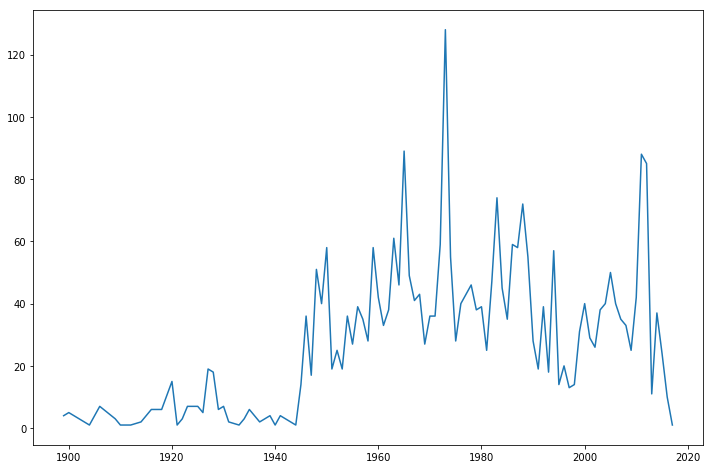

In [44]:
plt.figure(figsize=(12,8))
plt.plot(df1[df1.installation_year < 9999].groupby('installation_year')['spill_street_address'].count())

In [159]:
overall_month_seasonality = pd.DataFrame(df1[df1.cause == 'grease'].groupby(['year', 'month'])['report_date'].count())

In [160]:
overall_month_seasonality

report_date
year month             
2009 1                6
     2                8
     3               11
     4               12
     5               11
     6                8
     7                9
     8                8
     9                7
     10               6
     11              18
     12               7
2010 1               20
     2               15
     3                6
     4                3
     5                7
     6                6
     7                6
     8               13
     9               12
     10              11
     11               8
     12              18
2011 1               20
     2               18
     3               10
     4               13
     5                5
     6               11
     7                7
     8               11
     9               19
     10              23
     11              10
     12              13
2012 1               15
     2               17
     3               13
     4                9
     5               11
     6               16
     7                8
     8               10
     9               14
     10               8
     11              10
     12              16
2013 1               21
     2                6
     3               11
     4                8
     5                9
     6                6
     7                7
     8                4
     9                3
     10               7
     11               7
     12              12
2014 1                7
     2                4
     3                6
     4                3
     5                5
     6                4
     7                5
     8                5
     9                1
     10               4
     11               1
     12               6
2015 1                3
     2                5
     3                8
     4                4
     5                3
     6                2
     7                3
     8                6
     9                7
     10               7
     11               6
     12              13
2016 1               12
     2                7
     3                2
     4                7
     5                3
     6                4
     7                2
     8                1
     9                3
     10               6
     11               6
     12               6
2017 1                6
     2                7
     3                6
     4                4
     5                9
     6                4
     7                4
     8               10
     9                3
     10               6
     11              10
     12               2
2018 1                6
     2                9
     3                5
     4                2
     5                5
     6                2
     7                5
     8                5
     9                3
     10               3
     11               4
     12               2
2019 1                3
     2                4
     3                6

In [132]:
(df1.root_cause.value_counts()/df1.shape[0]) * 100

structural           38.862708
grease               19.195727
debris               13.949105
rain event           11.090167
contractor            5.152372
lift station          3.927113
other                 1.916431
vandalism             1.508011
rain event            1.508011
vandalism             0.754006
roots                 0.691172
lift station          0.471254
i/i                   0.377003
contractor            0.251335
na                    0.219918
by pass pump leak     0.094251
other                 0.031417
Name: root_cause, dtype: float64

In [131]:
(df1.cause.value_counts()/df1.shape[0]) * 100

grease                                                  30.034559
debris                                                  15.048696
i/i                                                     14.608860
debris/rock                                              7.979893
structural                                               7.665724
rags                                                     7.414389
break in main                                            7.288721
contractor                                               2.858938
lift station                                             1.319510
vandalism                                                1.193842
other                                                    0.911090
lift station power out                                   0.911090
roots                                                    0.879673
lift station pump out                                    0.659755
equipment failure                                        0.157085
other - ca

In [134]:
df2[(df2.root_cause == 'grease') & (df2.months_elapsed <= 6)].groupby('month').agg('count')

,report_date,total_gallons,gallons_returned,spill_start,spill_stop,hours,cause,actions,watershed,unit_id_1,unit_id_2,discharge_to,discharge_route,council_district,year,week,edwards_zone,pipe_diameter,pipe_length,pipe_type,installation_year,inches_no,rainfall_less_3,num_spills_compkey,num_spills_24mos,unit_type,asset_type,last_cleaned,response_time,response_datetime,public_notice,time_int,root_cause,steps_to_prevent,spill_street_address,multiple_spills,months_elapsed
month,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,2,8,8,8,8,8,8,8
2,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,2,13,13,13,13,13,13,13
3,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,1,9,9,9,9,9,9,9
4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,1,5,5,5,5,5,5,5
5,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,2,7,7,7,7,7,7,7
6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,0,5,5,5,5,5,5,5
7,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,1,4,4,4,4,4,4,4
8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,2,8,8,8,8,8,8,8
9,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,0,8,8,8,8,8,8,8


In [135]:
df2[(df2.root_cause != 'grease') & (df2.months_elapsed <= 6)].groupby('month').agg('count')

,report_date,total_gallons,gallons_returned,spill_start,spill_stop,hours,cause,actions,watershed,unit_id_1,unit_id_2,discharge_to,discharge_route,council_district,year,week,edwards_zone,pipe_diameter,pipe_length,pipe_type,installation_year,inches_no,rainfall_less_3,num_spills_compkey,num_spills_24mos,unit_type,asset_type,last_cleaned,response_time,response_datetime,public_notice,time_int,root_cause,steps_to_prevent,spill_street_address,multiple_spills,months_elapsed
month,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,3,59,59,59,59,59,59,59
2,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,4,50,50,50,50,50,50,50
3,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,9,48,48,48,48,48,48,48
4,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,13,48,48,48,48,48,48,48
5,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,5,47,47,47,47,47,47,47
6,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,9,44,44,44,44,44,44,44
7,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,1,16,16,16,16,16,16,16
8,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,3,22,22,22,22,22,22,22
9,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,1,31,31,31,31,31,31,31
